In [1]:
# Source: http://archive.ics.uci.edu/ml/datasets/heart+disease

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# We'll need this packaged to display our model
from sklearn import tree

# Useful for displaying visualizations
from IPython.display import Image

# Packages for rendering our tree
import pydotplus
import graphviz

In [3]:
data = pd.read_csv('Data\\processed.cleveland.data', delimiter=',', header =None, encoding ='latin8')
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = data[data.ca != '?']
data = data[data.thal != '?']
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
Y = pd.DataFrame()
Y['condition'] = data['num']

data.drop(['num'], axis = 1, inplace = True)

In [5]:
Y['condition'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

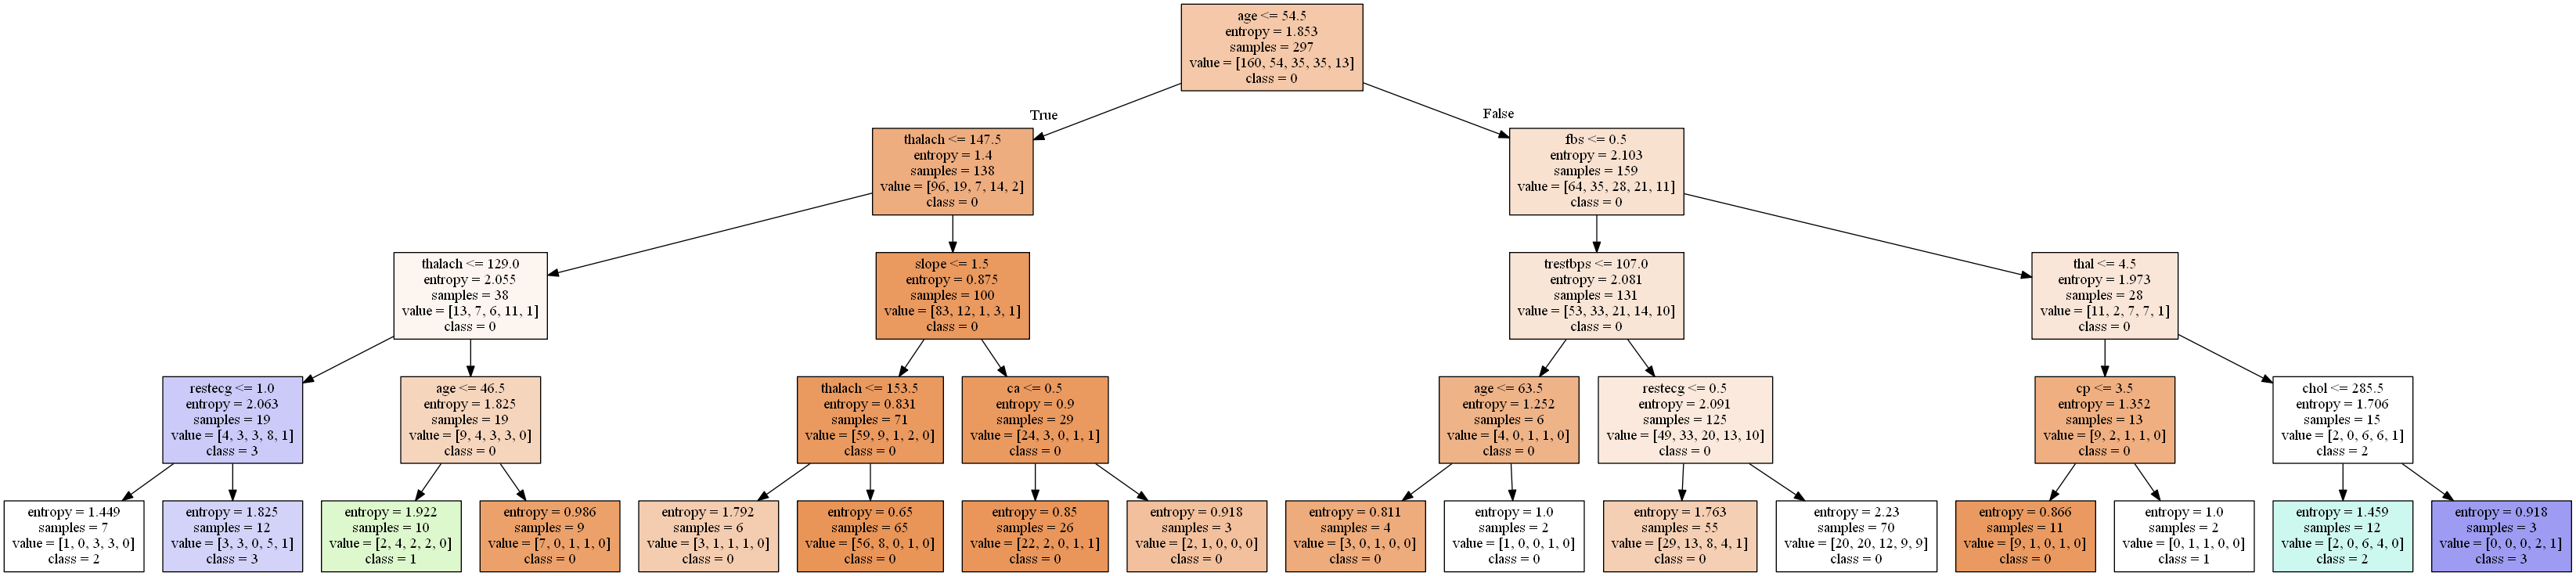

In [8]:
import time
start_time = time.time()
# pd.get_dummies(data)


decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(data, Y)

dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=data.columns,
    class_names = ['0', '1','2','3','4'],
    filled = True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(data, Y['condition'])

SelectKBest(k=5, score_func=<function f_classif at 0x000002748602B158>)